# [Groq](https://groq.com/)
- Groq은 AI 가속을 위한 특별한 칩 'LPU'를 만드는 미국 AI 회사입니다.
- 개발자를 위한 AI 추론 플랫폼으로, 텍스트, 음성, 이미지 AI 모델 등을 제공하고 있습니다.

## [Groq Cloud 가입](https://groq.com/groqcloud)

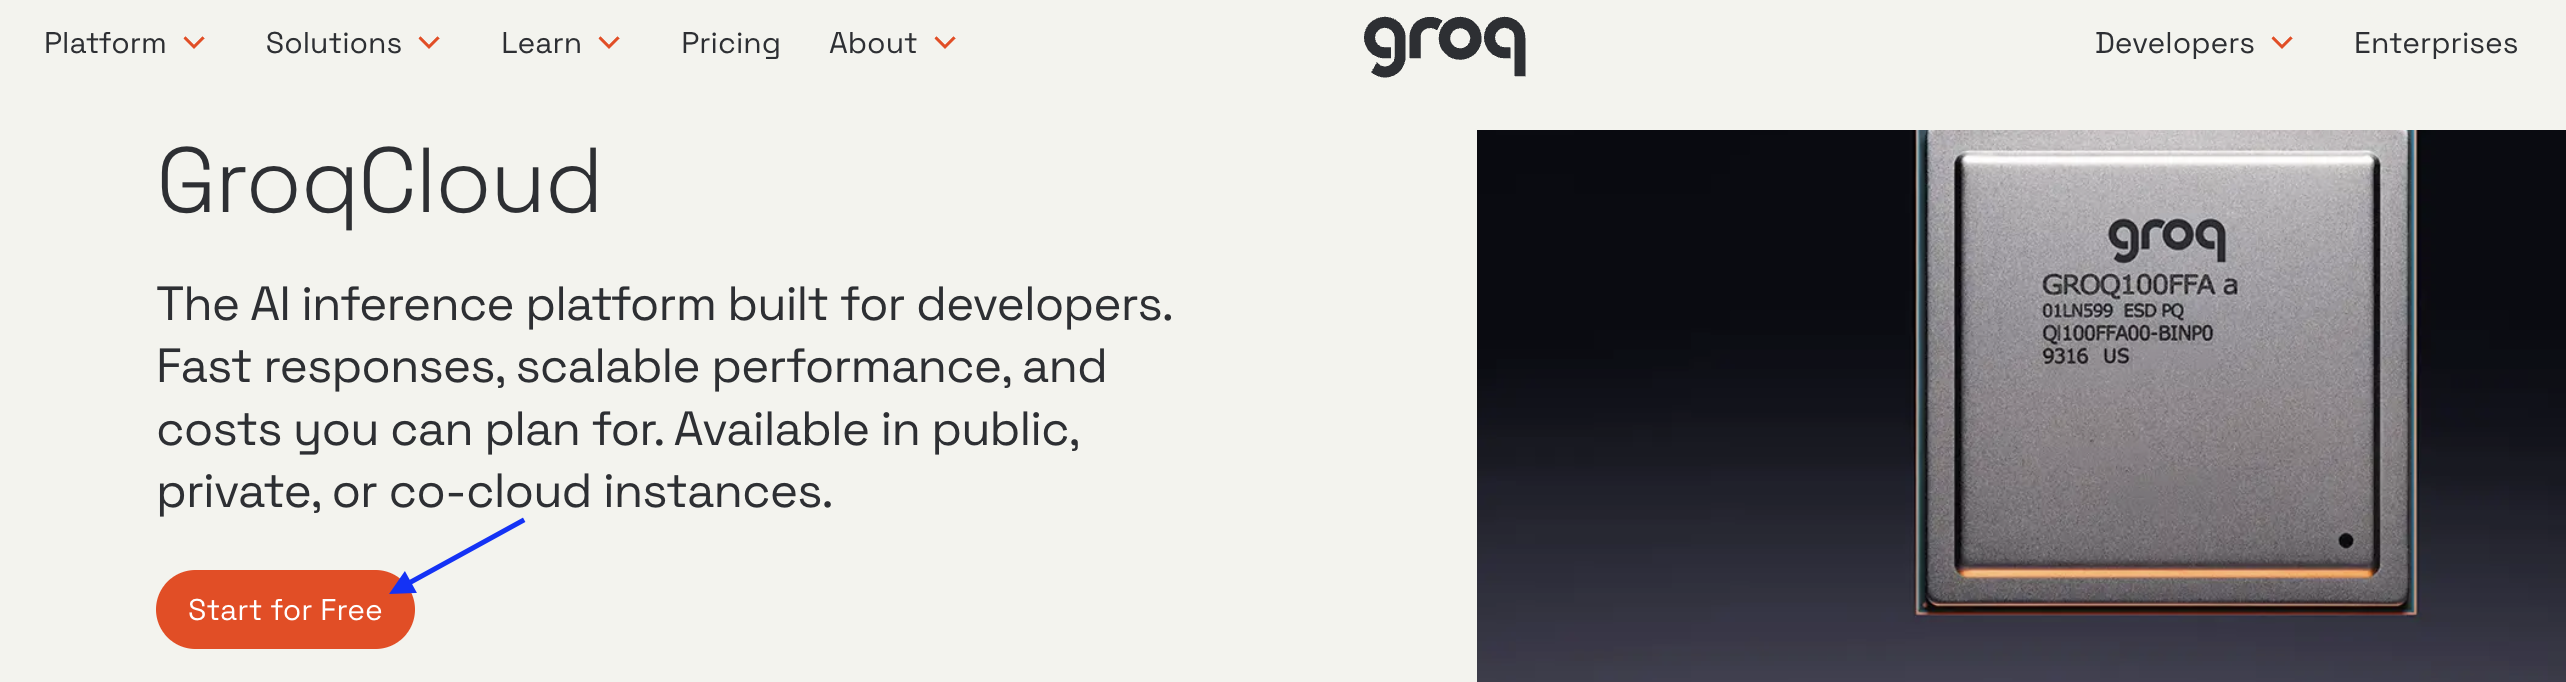

## [Groq Cloud 요금제](https://console.groq.com/settings/billing/plans)
- OpenAI API와는 다르게 Free(무료) 사용이 가능합니다.

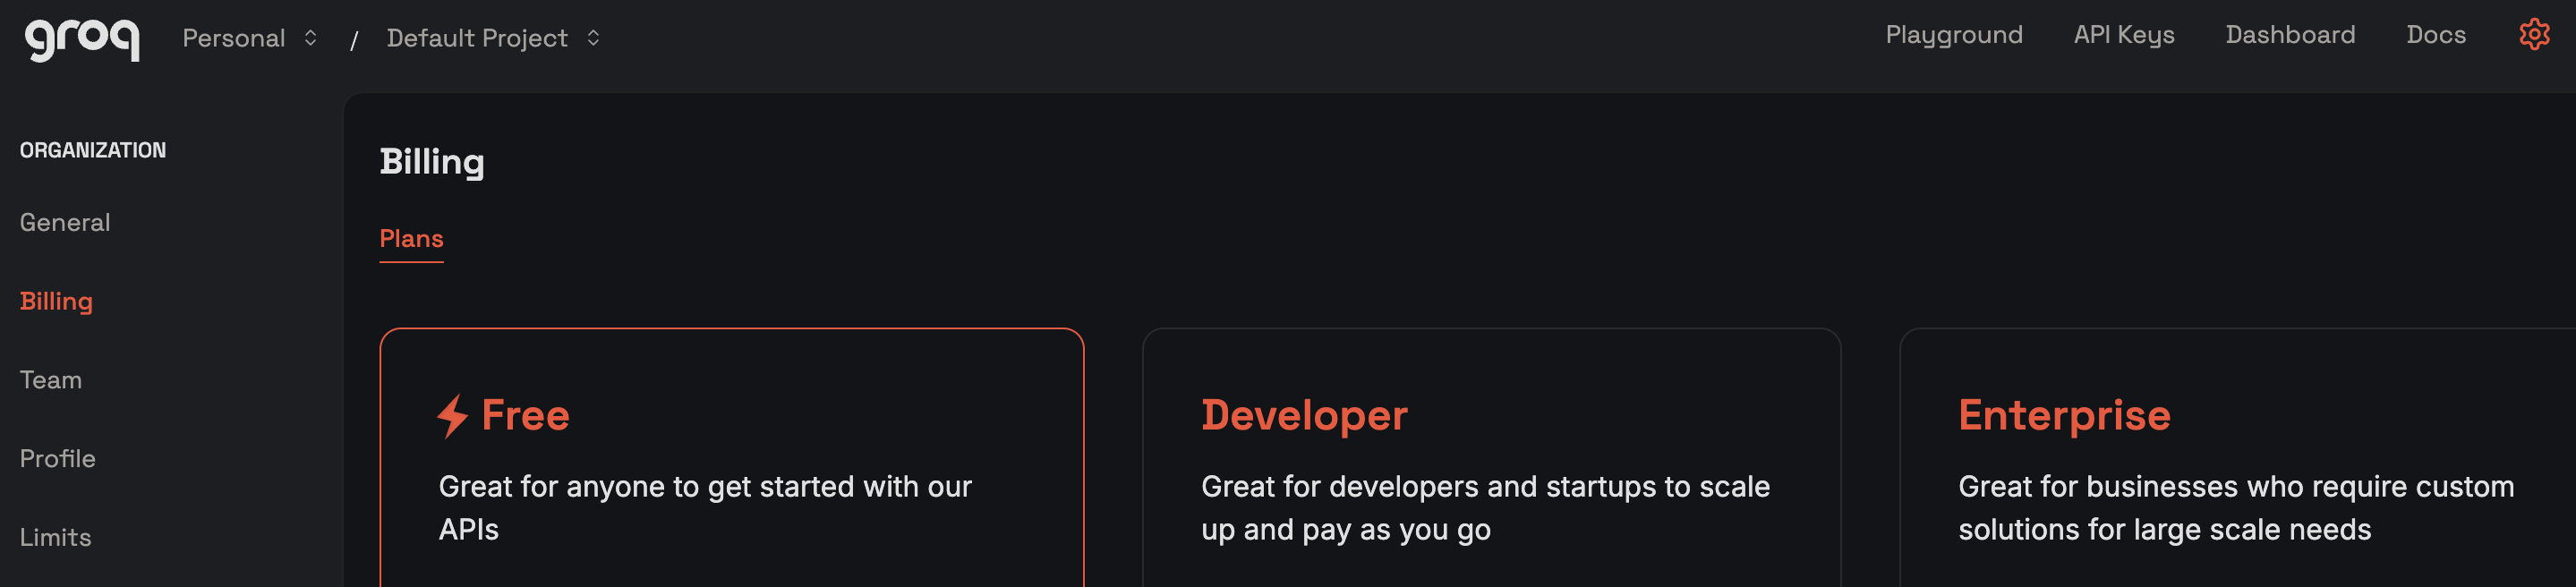

## [Groq API Key](https://console.groq.com/keys)

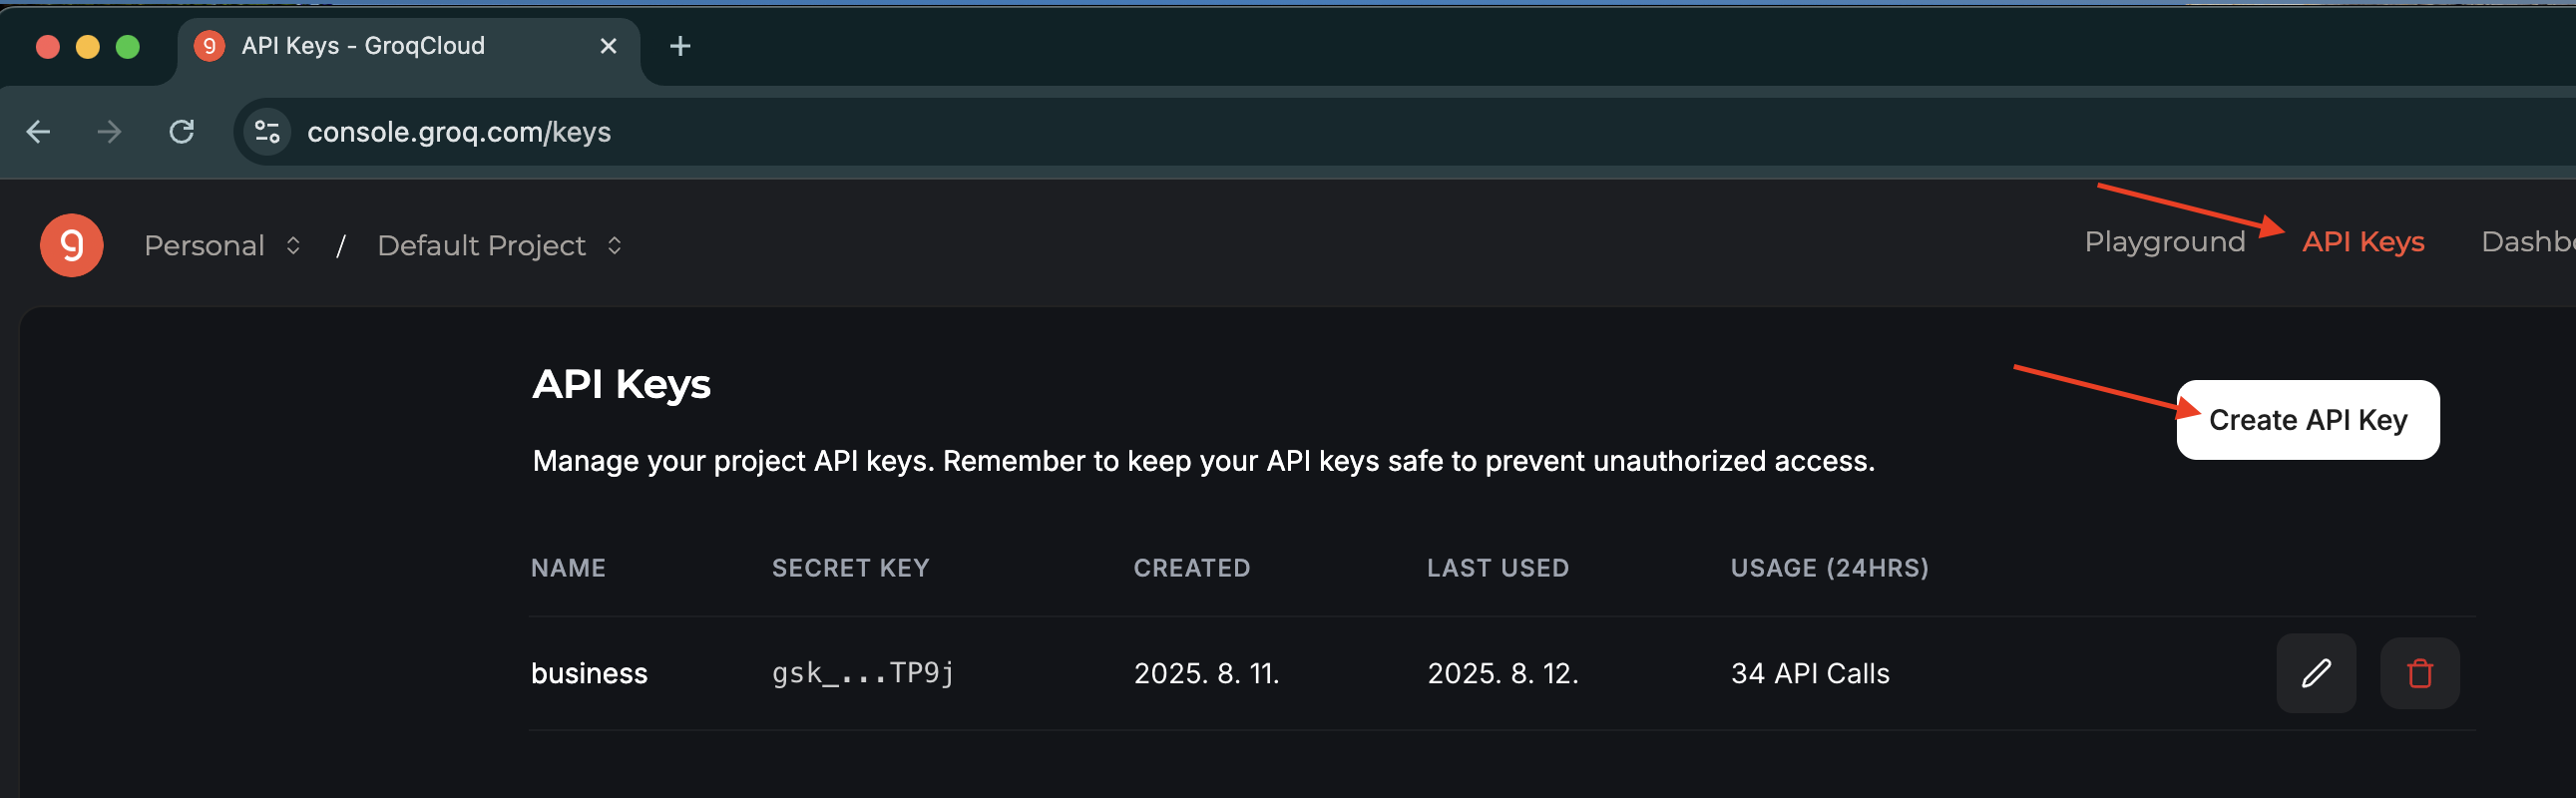

In [1]:
import os 

# 직접 적용 방법
# os.environ["GROQ_API_KEY"] = "sk-your_api_key_here"

In [2]:
from dotenv import load_dotenv

# dotenv 파일에서 환경변수 로드
load_dotenv()

True

In [3]:
# API 키 확인
api_key = os.getenv("GROQ_API_KEY")
if api_key:
    print("GROQ API 키가 설정되었습니다.")
else:
    print("GROQ API 키가 없습니다.")

GROQ API 키가 설정되었습니다.


## [Groq API Models](https://console.groq.com/docs/models)

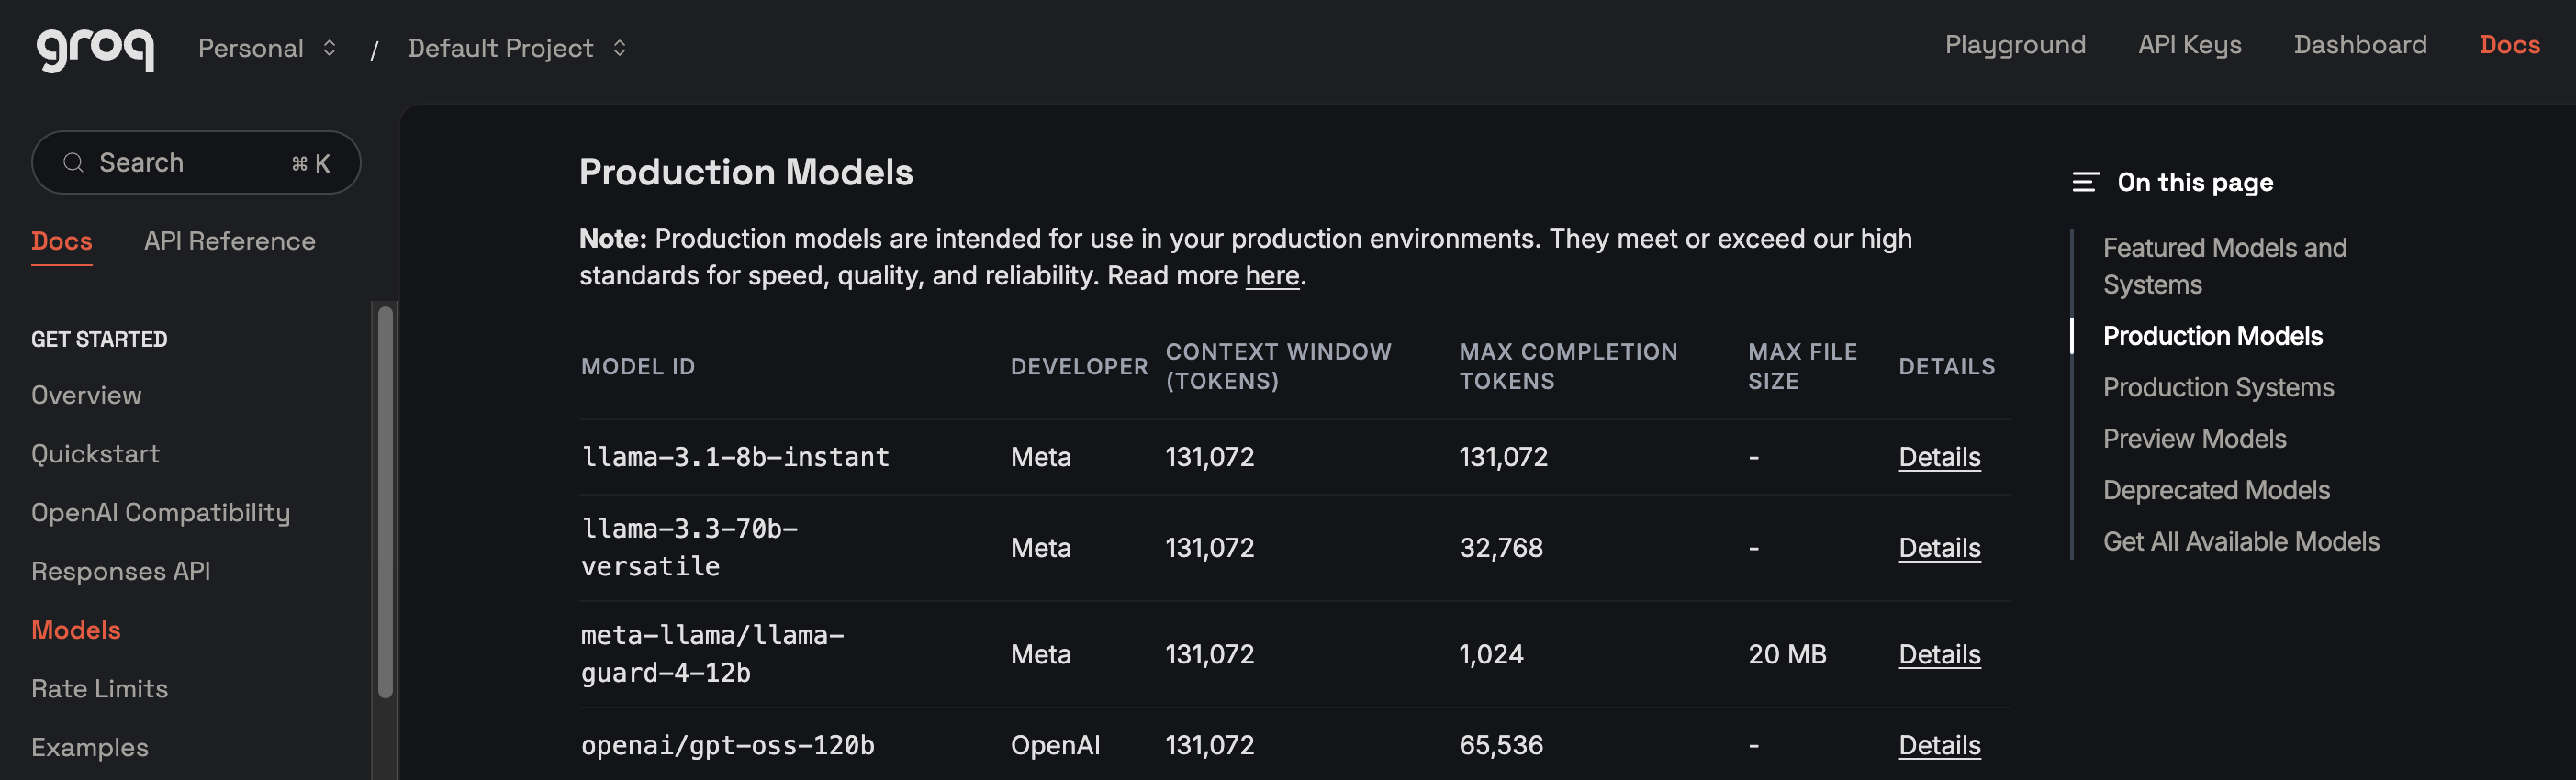

### [주요 파라미터](https://console.groq.com/docs/text-chat)

- 필수 파라미터

| 파라미터 | 설명 | 예시 |
|---------|------|------|
| **messages** | 대화 내용 리스트 (role과 content 포함) | `[{"role": "user", "content": "안녕"}]` |
| **model** | 사용할 모델 ID | `"llama-3.3-70b-versatile"` |

- 선택 파라미터 (중요)

| 파라미터 | 타입 | 기본값 | 설명 |
|---------|------|--------|------|
| **temperature** | 0~2 | 1 | 랜덤성 조절. 낮을수록 일관적, 높을수록 창의적 |
| **max_completion_tokens** | 정수 | - | 생성할 최대 토큰 수 |
| **top_p** | 0~1 | 1 | 핵 샘플링. 0.1이면 상위 10% 확률만 고려 |
| **stream** | true/false | false | 실시간 스트리밍 여부 |
| **stop** | 문자열/배열 | null | 생성 중단 시퀀스 (예: `", 6"`) |

- 고급 파라미터

| 파라미터 | 범위 | 설명 |
|---------|------|------|
| **frequency_penalty** | -2.0~2.0 | 같은 단어 반복 방지 (양수일수록 강함) |
| **presence_penalty** | -2.0~2.0 | 새로운 주제로 유도 (양수일수록 강함) |
| **seed** | 정수 | 결과 재현성을 위한 시드값 |
| **n** | 정수 | 생성할 응답 개수 (현재 1만 지원) |
| **user** | 문자열 | 사용자 식별자 (남용 방지용) |

- 응답 형식

| 파라미터 | 설명 |
|---------|------|
| **response_format** | 응답 형식 지정 (`json_schema`, `json_object` 등) |
| **include_reasoning** | 추론 과정 포함 여부 (일부 모델만 지원) |

- 스트리밍 옵션

| 파라미터 | 설명 |
|---------|------|
| **stream_options** | 스트리밍 응답 옵션 설정 (`stream: true`일 때만) |

# [Langchain with Groq Model](https://docs.langchain.com/oss/python/integrations/providers/groq)
- 대형 언어 모델(Large Language Model)을 LangChain 프레임워크 내에서 사용하기 위한 객체 또는 인터페이스를 말합니다.

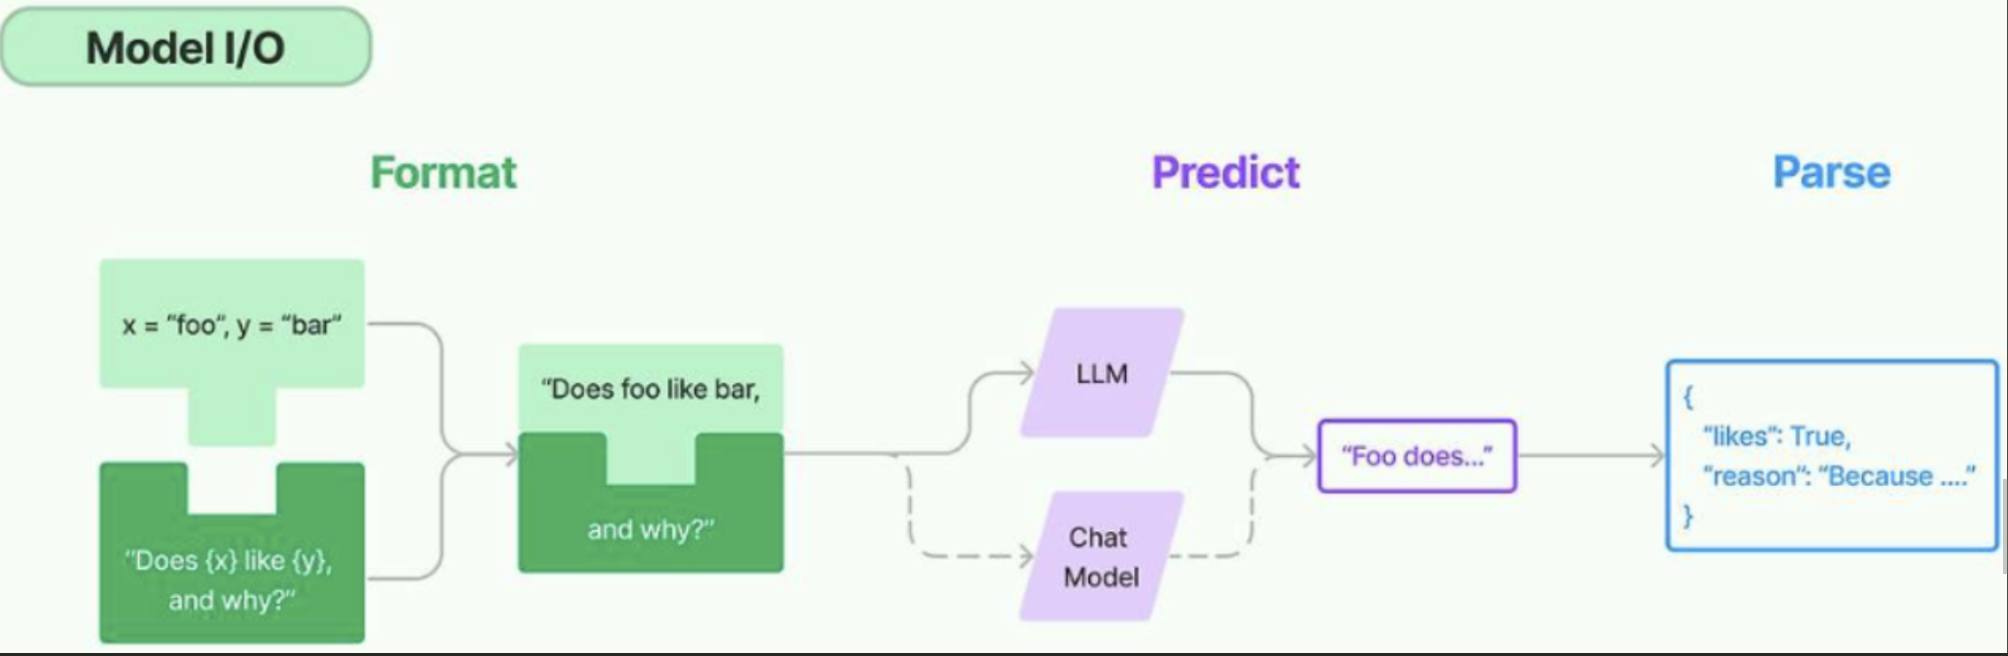

## 창작용 (Creative Writing)

In [4]:
from langchain_groq import ChatGroq

# 1. 창의적인 모델 (Creative Model)
# - temperature 높음 (1.2): 다양하고 창의적인 답변
# - top_p 높음 (0.95): 더 많은 선택지 고려
creative_llm = ChatGroq(
    model="llama-3.3-70b-versatile",
    temperature=1.2,
    top_p=0.95,
    max_tokens=2000
)

/Users/gyoungwon-cho/dev/github/Inflearn/langchain/1. Model/.venv/lib/python3.13/site-packages/pydantic/main.py:250: UserWarning: WARNING! top_p is not default parameter.
                    top_p was transferred to model_kwargs.
                    Please confirm that top_p is what you intended.
  validated_self = self.__pydantic_validator__.validate_python(data, self_instance=self)


In [5]:
# 사용자 입력에 대한 응답 생성
# response는 AI가 생성한 이야기
response = creative_llm.invoke("시간 여행자가 조선을 방문하는 5문장의 짧은 소설을 써줘."
)

In [6]:
response

AIMessage(content='시간 여행자가 기계를 작동시켜 조선 시대에 도착했다. 시간 여행자는 서울의 한복판에서 나타나게 되었고, 사람들은 그에게서 나타난 이상한 phục장에 놀랐다. 시간 여행자는 사람들에게 다가가서 인사를 하려고 했지만, 사람들은 그의 말을 이해하지 못했다. 시간 여행자는 주변을 둘러보다가 성균관의 학생들이 공부하는 것을 보고, 시간 여행자는 ihnen에 가서 학생들과 대화를 나누었다. 시간 여행자는 조선 시대에 있는 동안 많은 것을 배웠고, 다시 자신의 시대로 돌아가고 싶다는 생각을 했다.', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 139, 'prompt_tokens': 58, 'total_tokens': 197, 'completion_time': 0.631894803, 'prompt_time': 0.003127654, 'queue_time': 0.048239252, 'total_time': 0.635022457}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_34d416ee39', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--fee97b95-8eed-4dd9-90a0-108b2afcf614-0', usage_metadata={'input_tokens': 58, 'output_tokens': 139, 'total_tokens': 197})

In [7]:
print(response.content)

시간 여행자가 기계를 작동시켜 조선 시대에 도착했다. 시간 여행자는 서울의 한복판에서 나타나게 되었고, 사람들은 그에게서 나타난 이상한 phục장에 놀랐다. 시간 여행자는 사람들에게 다가가서 인사를 하려고 했지만, 사람들은 그의 말을 이해하지 못했다. 시간 여행자는 주변을 둘러보다가 성균관의 학생들이 공부하는 것을 보고, 시간 여행자는 ihnen에 가서 학생들과 대화를 나누었다. 시간 여행자는 조선 시대에 있는 동안 많은 것을 배웠고, 다시 자신의 시대로 돌아가고 싶다는 생각을 했다.


## 정확한 답변용 (Fact-based)

In [8]:
from langchain_groq import ChatGroq

# 2. 정확한 모델 (Precise Model)
# - temperature 낮음 (0.1): 일관되고 정확한 답변
# - top_p 낮음 (0.1): 가장 확실한 답만 선택
fact_llm = ChatGroq(
    model="llama-3.3-70b-versatile",
    temperature=0.1,
    top_p=0.1,
    max_tokens=2000
)

/Users/gyoungwon-cho/dev/github/Inflearn/langchain/1. Model/.venv/lib/python3.13/site-packages/pydantic/main.py:250: UserWarning: WARNING! top_p is not default parameter.
                    top_p was transferred to model_kwargs.
                    Please confirm that top_p is what you intended.
  validated_self = self.__pydantic_validator__.validate_python(data, self_instance=self)


In [9]:
response = fact_llm.invoke("지구에서 가장 깊은 바다는 어디야?"
)

In [10]:
print(response.content)

지구에서 가장 깊은 바다는 태평양에 있는 마리아나 해沟입니다. 특히, 마리아나 해沟의 최심점인 챌린저 딥(Challenger Deep)은 해수면 아래 약 11,000미터(36,000피트)의 깊이를 가지고 있습니다.
